<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/k_means_clustering_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

# Summary

In this Notebook, we are going to see how to use K-means clustering algorithm for image quantization. To do it, we are going to code the function color_quantization, which performs all the processing. As parameters, this function will receive the `image` and `k` value. This second parameter controls the number of clusters. In this case, the number of clusters means the number of colors of the resulting image. 

# Code

All the code is provided as follows.

In [ ]:
#Import required packages:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import collections
from google.colab.patches import cv2_imshow

In [ ]:
def color_quantization(image, k):
    """Performs color quantization using K-means clustering algorithm"""

    # Transform image into 'data':
    data = np.float32(image).reshape((-1, 3))

    # Define the algorithm termination criteria (the maximum number of iterations and/or the desired accuracy):
    # In this case the maximum number of iterations is set to 20 and epsilon = 1.0
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)

    # Apply K-means clustering algorithm:
    # ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS)
    
    # At this point we can make the image with k colors
    # Convert center to uint8:
    center = np.uint8(center)

    # Replace pixel values with their center value:
    result = center[label.flatten()]
    result = result.reshape(image.shape)

    # Build the 'color_distribution' legend.
    # We will use the number of pixels assigned to each center value:
    counter = collections.Counter(label.flatten())

    # Calculate the total number of pixels of the input image:
    total = image.shape[0] * image.shape[1]

    # Assign width and height to the color_distribution image:
    desired_width = image.shape[1]
    # The difference between 'desired_height' and 'desired_height_colors'
    # will be the separation between the images
    desired_height = 70
    desired_height_colors = 50

    # Initialize the color_distribution image:
    color_distribution = np.ones((desired_height, desired_width, 3), dtype="uint8") * 255
    # Initialize start:
    start = 0

    for key, value in counter.items():
        # Calculate the normalized value:
        value_normalized = value / total * desired_width

        # Move end to the right position:
        end = start + value_normalized

        # Draw rectangle corresponding to the current color:
        cv2.rectangle(color_distribution, (int(start), 0), (int(end), desired_height_colors), center[key].tolist(), -1)
        # Update start:
        start = end

    return np.vstack((color_distribution, result))

# Testing the function

At this point, we can test the function `color_quantization`. In order to do so, we are going to download an image from the repository.
Moreover, in this example, we are going to apply a bilateral filter to reduce noise in the input image and compare both outputs.

In [ ]:
!wget "https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/thermal-image.JPG"

--2021-02-23 13:56:59--  https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/thermal-image.JPG
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 806043 (787K) [image/jpeg]
Saving to: ‘thermal-image.JPG’

thermal-image.JPG   100%[===================>] 787.15K  --.-KB/s    in 0.06s   

2021-02-23 13:57:00 (13.6 MB/s) - ‘thermal-image.JPG’ saved [806043/806043]



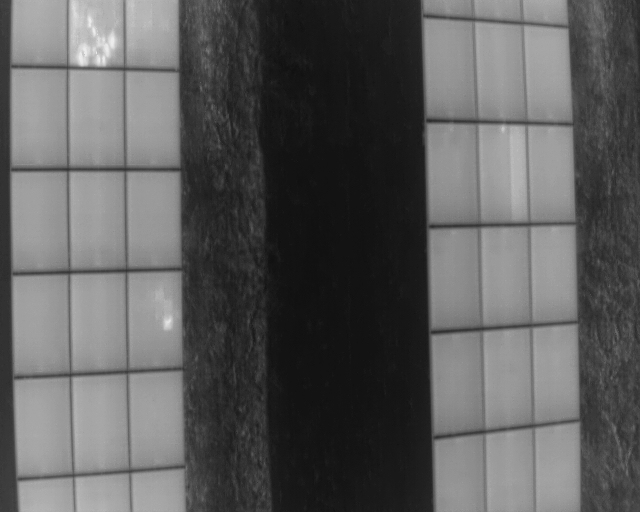

In [ ]:
img = cv2.imread("thermal-image.JPG")
cv2_imshow(img)

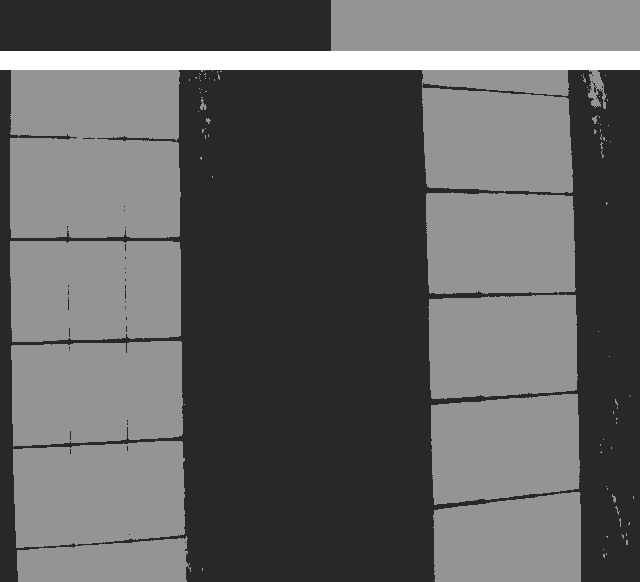

In [ ]:
# Apply color quantization (K-means with K=2)
img_result = color_quantization(img, 2)
cv2_imshow(img_result)

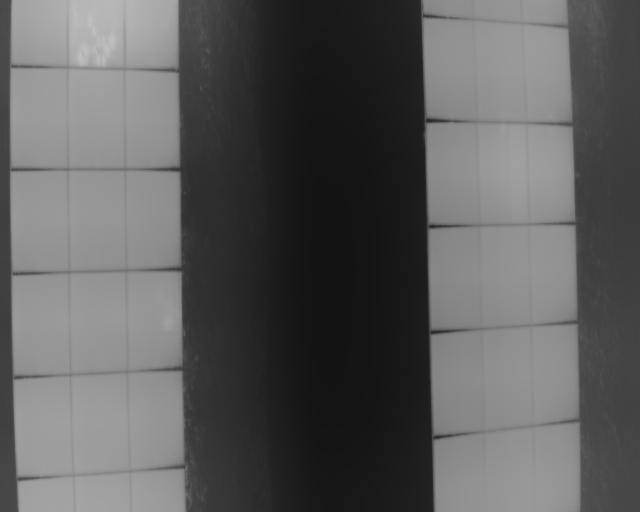

In [ ]:
# Apply bilateral filter to reduce noise in the input image:
img_bilateral_blur = cv2.bilateralFilter(img, 100, 120, 120)
cv2_imshow(img_bilateral_blur)

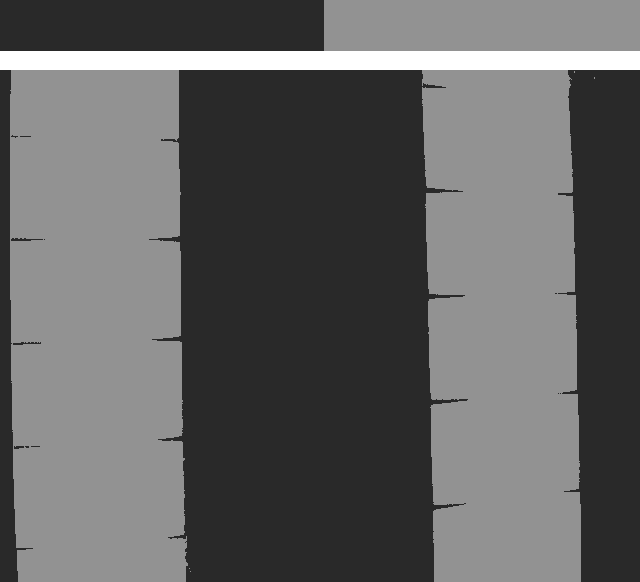

In [ ]:
# Apply color quantization (K-means with K=2)
img_result_bilateral_blur = color_quantization(img_bilateral_blur, 2)
cv2_imshow(img_result_bilateral_blur)

# Conclusions

In this Notebook we have seen how to perform color quantization using OpenCV. We have also see that in some cases, applying a pre-processing step in order to reduce noise (in this case) can be a good point to explore when building your image processing pipelines.